In [2]:
from matplotlib.image import *
from matplotlib.pyplot import *
import math as mt
import numpy as np
from PIL import Image

In [9]:
img=imread(r"C:\Users\DUCS-33\Documents\dip\img.jpg")

In [10]:
img2=imread(r"C:\Users\DUCS-33\Documents\dip\img2.jpg")

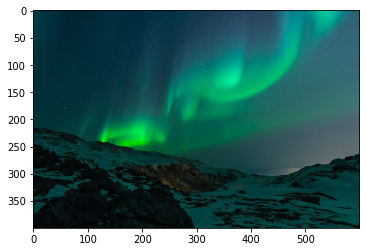

In [11]:
imshow(img)

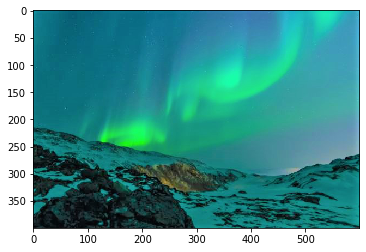

In [13]:
imshow(img2)

In [5]:
count=[0]*256

(400, 600)


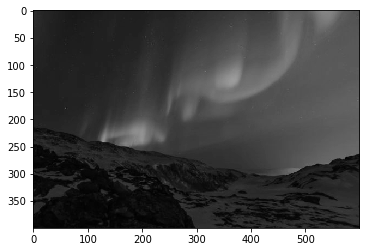

In [16]:
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


def histogramMatching(image):
    #Objective: Display Intensity Histogram for an Image
    #Input: Original Image
    #Output: Return Equalized Image
    temp=[]
    for i in range(image.shape[0]):
        temp2=0
        temp3=[]
        for j in range(image.shape[1]):
            temp2=image[i][j][0]*0.3+image[i][j][1]*0.59+image[i][j][2]*0.11
            #if temp2>0:
            temp2=math.floor(temp2)
            temp3.append(temp2)
        temp.append(list(temp3))
    temp=np.array(temp)
    #imshow(temp)
    imshow(temp, cmap='gray', vmin=0, vmax=255)
    print(temp.shape)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Converting Image to Gray Scale
    intensityFrequency =[0.0]*256
    height = image.shape[0]
    width = image.shape[1]
    no_of_pixels = height*width
    
    #Finding the Frequency of each Intensity Level in an Image
    for i in range(0, height):
        for j in range(0, width):
            intensityFrequency[temp[i, j]] += 1.0
    global count
    count=list(intensityFrequency)
    #Probability of each Intensity Level
    for i in range(0,255):
        intensityFrequency[i] = intensityFrequency[i]/no_of_pixels
        
    #Mapping of Intensity Level to the Corresponding Resultant Intensity Level
    #Resultant Intensity Level = floor(Cumulative Frequency of an Intensity Level * (Maximum Level - 1) + 0.5)
    cumulativeIntensityFrequency = 0.0
    mappingIntensityLevel = [0]*256
    for i in range(0,255):
        cumulativeIntensityFrequency += intensityFrequency[i]
        mappingIntensityLevel[i] = math.floor(cumulativeIntensityFrequency * 255 + 0.5)
        
    
    return mappingIntensityLevel
    

imageI1 = histogramMatching(img)

#imshow(output)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(400, 600)


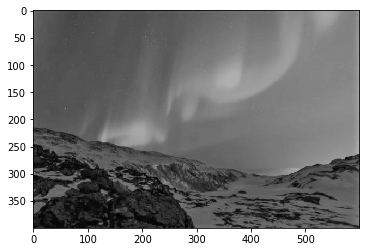

In [17]:
imageI2 = histogramMatching(img2)

In [22]:
len(imageI1)

256

In [23]:
len(imageI2)

256

In [33]:
def compare(img1,img2):
    mapping=[0]*256
    temp=0
    j=0
    for i in range(len(img1)):
        while(j<256):
            if img1[i]==img2[j]:
                mapping[i]=int(j)
                break
            elif img1[i]<img2[j]:
                if abs(img1[i]-img2[j])<abs(img1[i]-img2[j-1]):
                    mapping[i]=int(j)
                else:
                    mapping[i]=int(j-1)
                break
            j+=1
            
    return mapping


                

In [44]:
output=compare(imageI1,imageI2)
output=np.array(output)

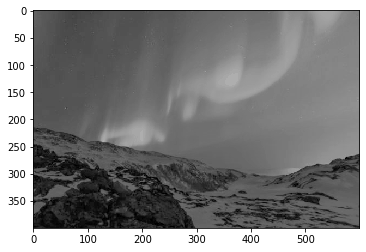

In [59]:
height = img.shape[0]
width = img.shape[1]


image=img
temp=[]  
for i in range(image.shape[0]):
    temp2=0
    temp3=[]
    for j in range(image.shape[1]):
        temp2=image[i][j][0]*0.3+image[i][j][1]*0.59+image[i][j][2]*0.11
        #if temp2>0:
        temp2=math.floor(temp2)
        temp3.append(temp2)
    temp.append(list(temp3))
temp=np.array(temp)
    
resultant_image=np.array(temp)
for i in range(0, height):
        for j in range(0, width):
            resultant_image[i][j] = output[temp[i, j]]
    
imshow(resultant_image,cmap='gray',vmin=0,vmax=255)

In [58]:
resultant_image.shape

(400, 600)